<a href="https://colab.research.google.com/github/torcodex/2D-transformation/blob/main/Predict_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Get Kaggle token file to accesss dataset
from google.colab import files
files.upload()
# make a directory named kaggle
!mkdir -p ~/.kaggle
# copy the file we have downloaded
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# install kaggle package to help get dataset from kaggle
!pip install kaggle


Saving kaggle.json to kaggle.json


In [4]:
# download dataset from redwankerimsony/heart-diease-data to /content/heart-diease unzipped
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 38.2MB/s]


In [5]:
# read the heart disease dataset
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# check if there are any missing value or null value
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [7]:
# finding the col's with numeric values
num_cols=df.select_dtypes(include='number').columns
# fills the missing numeric columns with mean of the that perticular column
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())

In [8]:
# importing libraries for data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

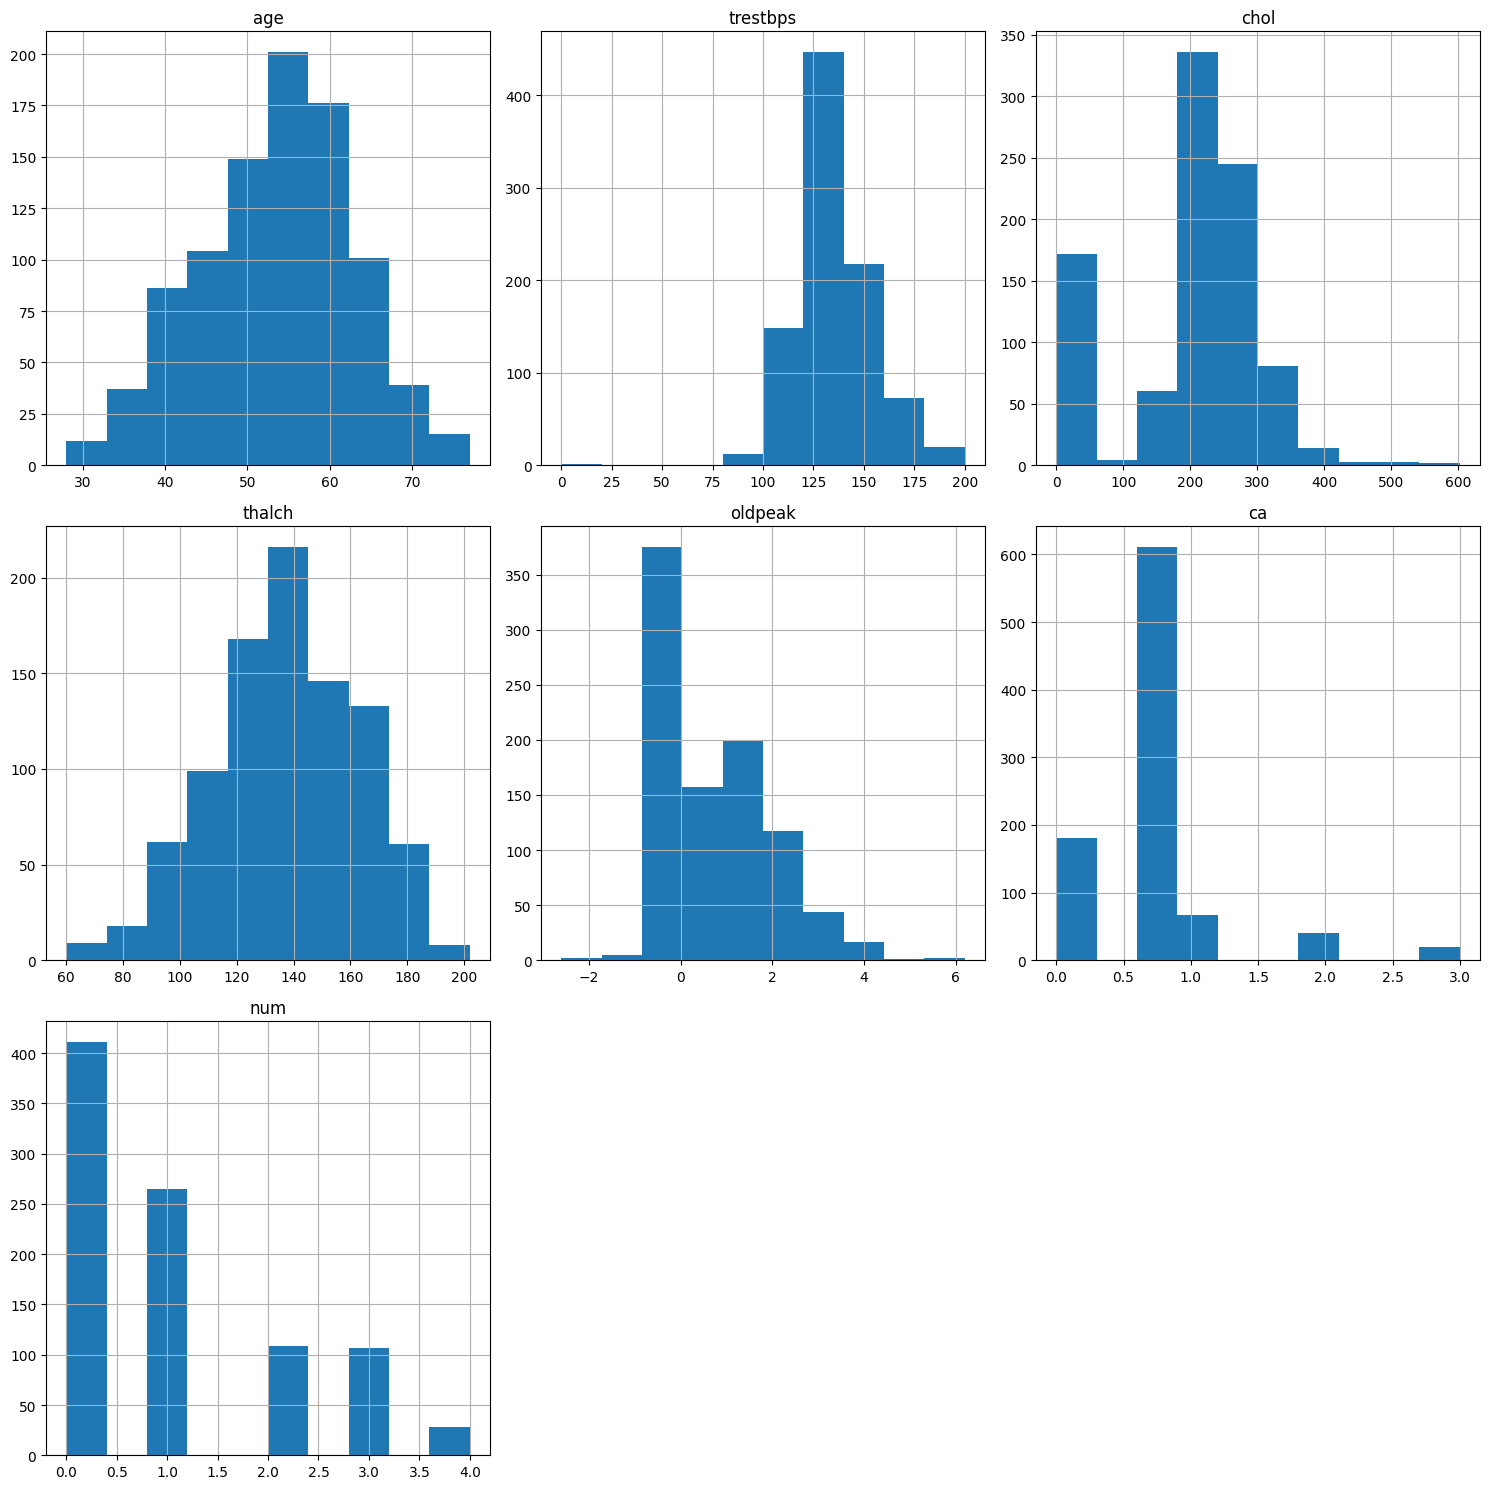

In [9]:
# removing id for selected columns
num_cols = [col for col in num_cols if col != 'id']
# plotting a histogram for all the columns in the datasets
df[num_cols].hist(figsize=(15,15))
plt.tight_layout()
plt.show()

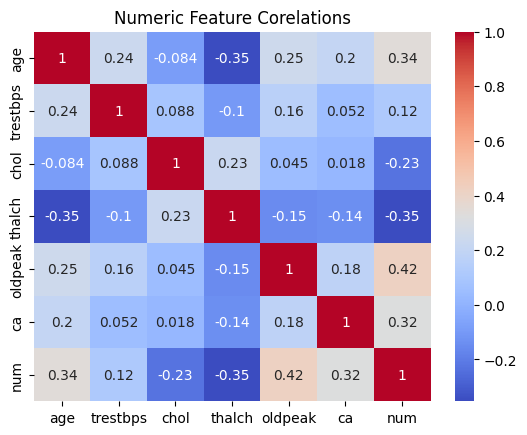

In [10]:
# visualization of heatmap by getting correlation of the columns
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Numeric Feature Corelations')
plt.show()

In [11]:
# removes the column named num
cat_col = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_col:
    cat_col.remove('num')
# remove the column named num; if axis=1 drops column and axis=0 drops row
x = df.drop('num',axis=1)
y = (df['num']>0).astype(int)

In [12]:
# earlier catagorized columns were converted into numeric values
x = pd.get_dummies(x,columns=cat_col)
print("Final feature columns: ",x.columns)


Final feature columns:  Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [13]:
# importing tool called train_test_split which could help in dividing dataset into 2 parts training and testing
from sklearn.model_selection import train_test_split
# importing StandardScaler which help in standardizing the scale numeric values
from sklearn.preprocessing import StandardScaler

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# scailing testing and training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [28]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train_scaled,y_train)
y_pred_lr = lr_model.predict(x_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_lr = lr_model.predict(x_test_scaled)

# Convert predictions to binary (0 or 1) using a threshold
y_pred_lr_binary = (y_pred_lr > 0.5).astype(int)

print("Logistic Regresion Accuracy:", accuracy_score(y_test,y_pred_lr_binary))
print(classification_report(y_test,y_pred_lr_binary))

Logistic Regresion Accuracy: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        75
           1       0.88      0.89      0.89       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



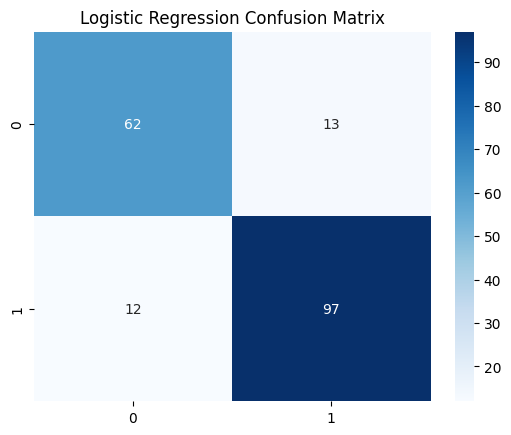

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr_binary)
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

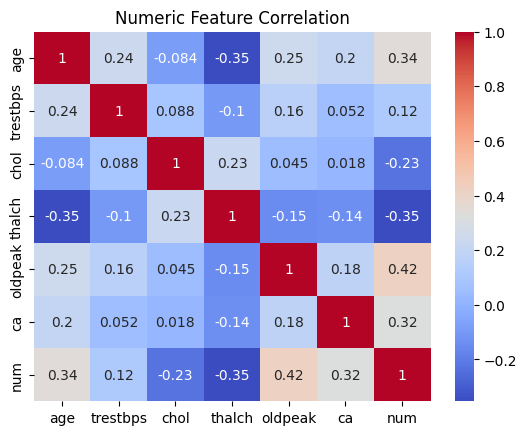

In [21]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap="coolwarm")
plt.title("Numeric Feature Correlation")
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators is like 100 trees in the forest, random_state is the split b/t test and train
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_scaled,y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
print("Random forest Accuracy: ", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random forest Accuracy:  0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



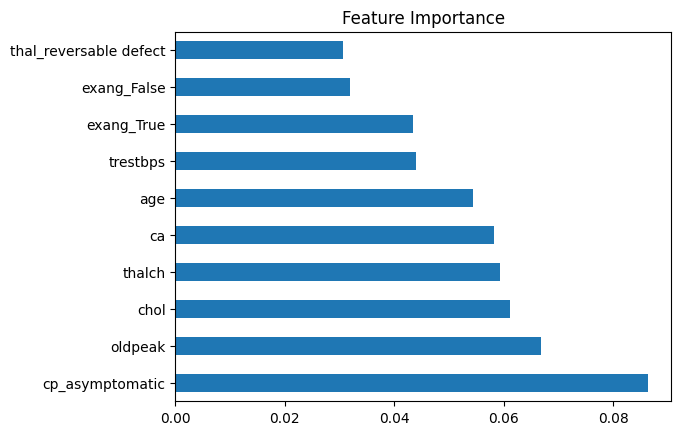

<Axes: xlabel='None', ylabel='None'>

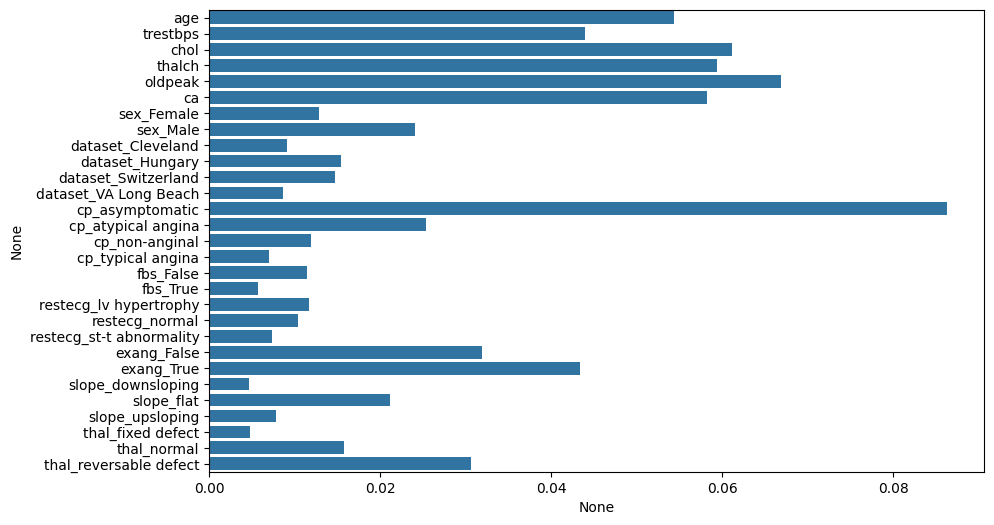

In [23]:
# feature importance is analysed
feat_imp = pd.Series(rf_model.feature_importances_,index=x.columns)
# drop the 'id' column if it exists
if "id" in feat_imp.index:
    feat_imp = feat_imp.drop("id")
# plot top 10 features
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp,y=feat_imp.index)

In [24]:
import joblib
joblib.dump(rf_model,'heart_rf_model.pkl')
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [26]:
sample = x.head(1)
sample.to_csv("Heart_user_template.csv", index=False)
print("User Template saved as Heart_user_template.csv")

User Template saved as Heart_user_template.csv


In [30]:
from google.colab import files
files.upload()

Saving Heart_dataset.csv to Heart_dataset.csv


{'Heart_dataset.csv': b'id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect\r\n1,63,145,233,150,2.3,0,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE\r\n12,32,122,241,130,2.5,1,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE\r\n'}

In [33]:
import joblib
import pandas as pd

user_df = pd.read_csv("Heart_dataset.csv")

# Getting list from training dataset
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# We are dropping columns which are extra in user_df than required to avoid error
num_cols = [col for col in num_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill the missing numeric column, catagory columns & bool column
user_df[num_cols] = user_df[num_cols].fillna(user_df[num_cols].mean())
for col in cat_cols:
    user_df[col] = user_df[col].fillna("unknown")

for col in bool_cols:
    user_df[col] = user_df[col].astype(int)
# One-hot encoding cat column
user_df_encoded=pd.get_dummies(user_df,columns=cat_cols)

# Align columns
user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)

# Scale Data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

# Prediction
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_df_scaled)
user_df["Heart_Disease_Prediction"] = preds
user_df.to_csv("Heart_prediction.csv", index=False)
print(user_df)

   id  age  trestbps  chol  thalch  oldpeak  ca  sex_Female  sex_Male  \
0   1   63       145   233     150      2.3   0       False      True   
1  12   32       122   241     130      2.5   1        True     False   

   dataset_Cleveland  ...  restecg_st-t abnormality  exang_False  exang_True  \
0               True  ...                     False         True       False   
1               True  ...                      True         True        True   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0               True       False            False               True   
1               True       False            False              False   

   thal_normal  thal_reversable defect  Heart_Disease_Prediction  
0        False                   False                         0  
1         True                   False                         1  

[2 rows x 31 columns]
